Found 7016 images belonging to 5 classes.
Found 876 images belonging to 5 classes.
Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 428s 2s/step - accuracy: 0.8479 - loss: 0.1675 - val_accuracy: 0.9826 - val_loss: 0.0226
Epoch 2/10
  1/219 ━━━━━━━━━━━━━━━━━━━━ 4:49 1s/step - accuracy: 0.9375 - loss: 0.0415

C:\Users\varun\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9375 - loss: 0.0415 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 343s 2s/step - accuracy: 0.9803 - loss: 0.0320 - val_accuracy: 0.9861 - val_loss: 0.0149
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 0.0102 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 388s 2s/step - accuracy: 0.9866 - loss: 0.0209 - val_accuracy: 0.9907 - val_loss: 0.0102
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9688 - loss: 0.0145 - val_accuracy: 1.0000 - val_loss: 0.0085
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 394s 2s/step - accuracy: 0.9889 - loss: 0.0155 - val_accuracy: 0.9931 - val_loss: 0.0081
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 0.0071 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 315s 1s/step - accuracy: 0.9868 - loss: 0.0165 - val_accuracy: 0.9919 - 

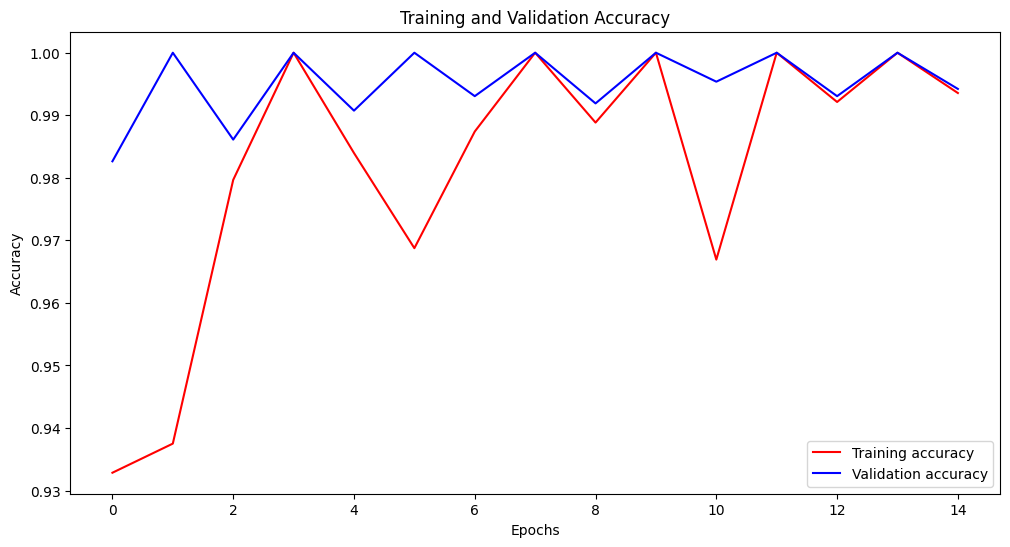

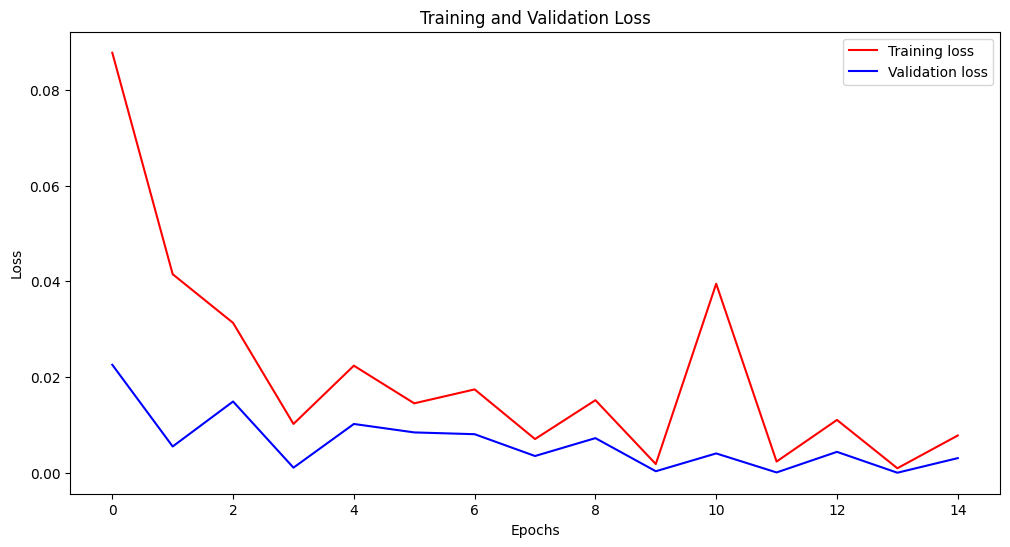

Found 880 images belonging to 5 classes.
28/28 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.9974 - loss: 0.0018
Test Loss: 0.003007813822478056, Test Accuracy: 0.9954545497894287
28/28 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step
Class-wise Accuracies:
Bud Root Dropping: 100.00%
Bud Rot: 100.00%
Gray Leaf Spot: 100.00%
Leaf Rot: 97.62%
Stem Bleeding: 100.00%


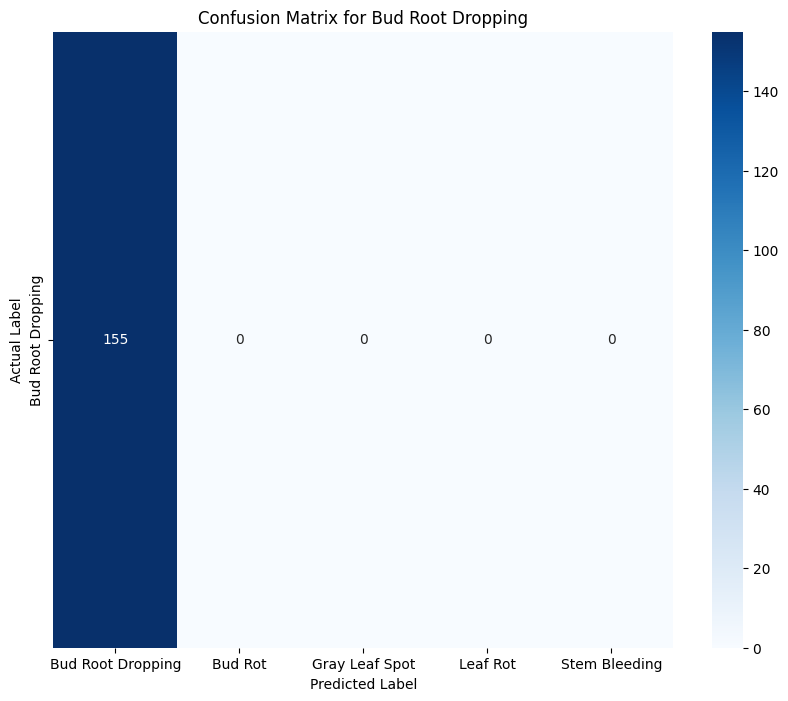

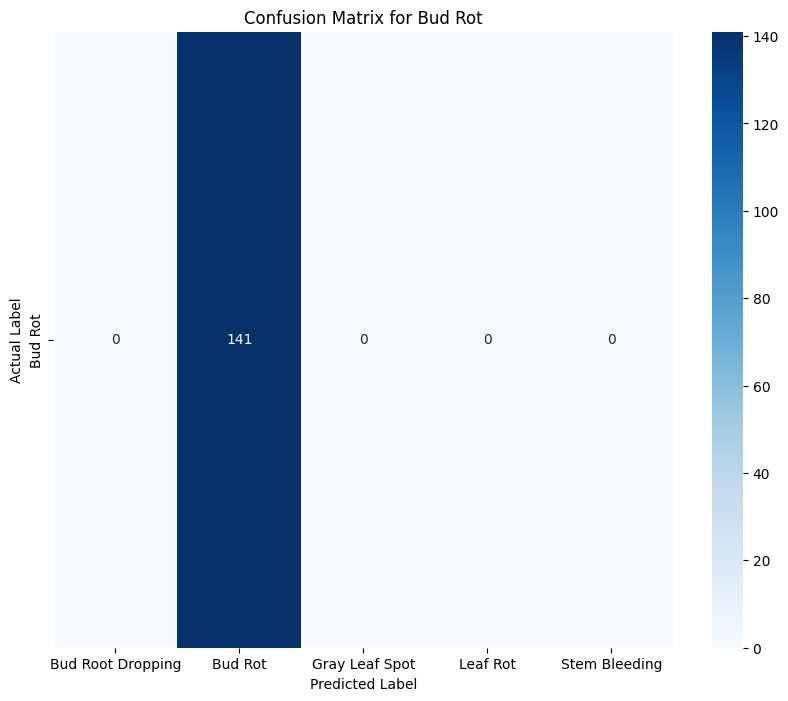

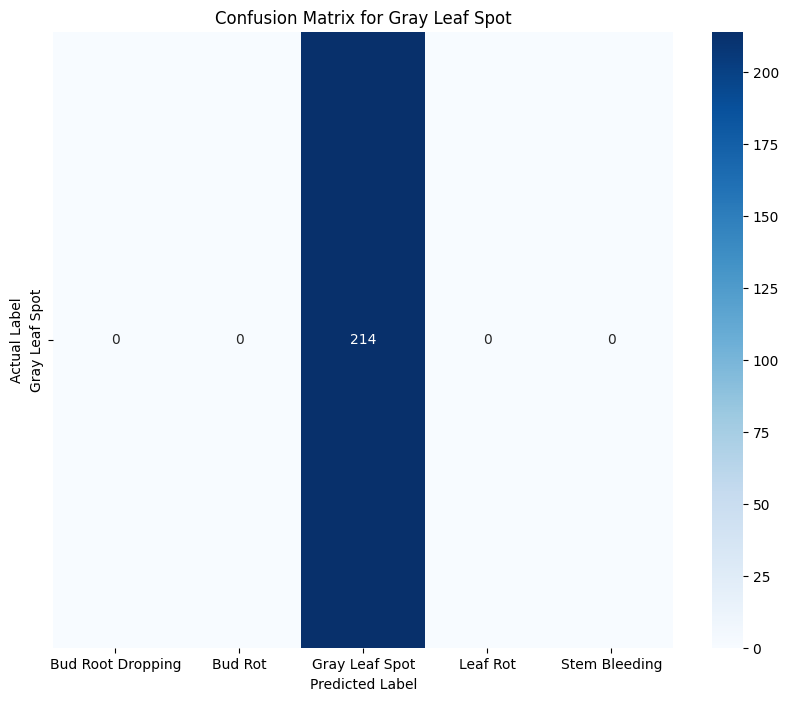

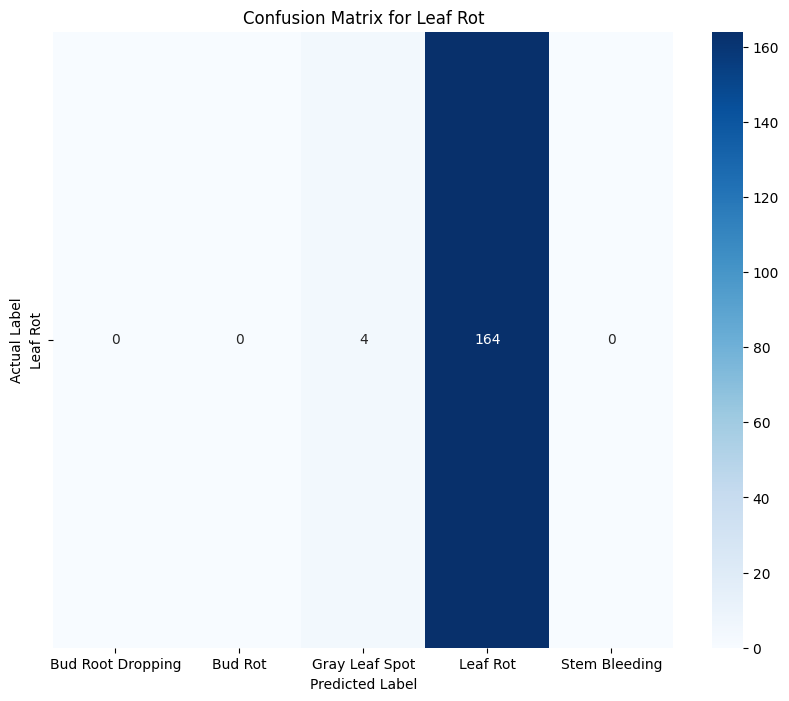

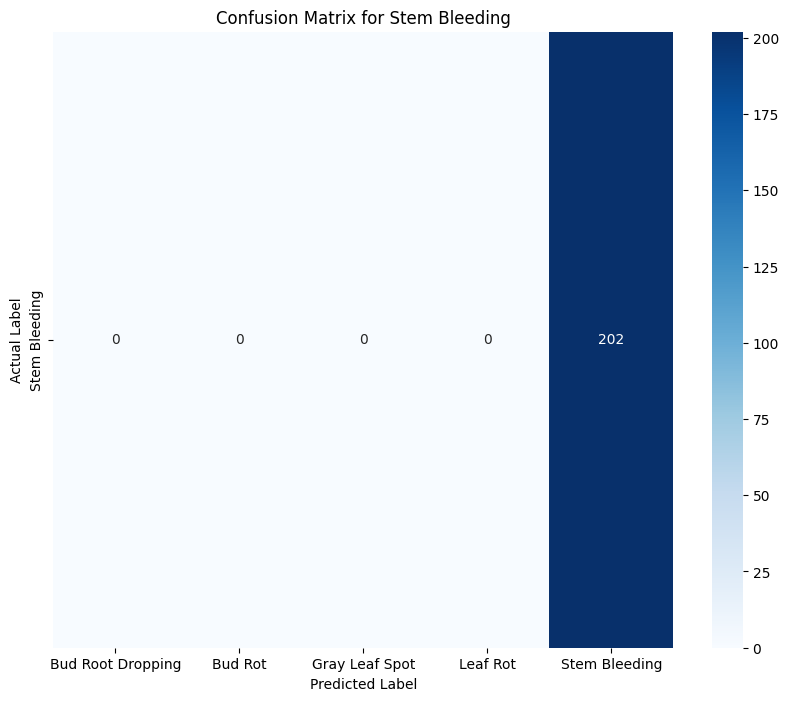

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

# Directories
train_dir = r"C:\Users\varun\data_set\divide\train"
test_dir = r"C:\Users\varun\data_set\divide\test"
validation_dir = r"C:\Users\varun\data_set\divide\val"

# Data Generators
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
)

# Data Generators Flow From Directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Use 'categorical' if it's multi-class, change to 'binary' if binary
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Use 'categorical' if it's multi-class, change to 'binary' if binary
)

# Model
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='sigmoid')  # Assuming 5 classes, change to 1 if binary classification
])

# Freeze the base model during the first training phase
base_model.trainable = False

# Compilation
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',  # Use 'binary_crossentropy' for binary or multi-label classification
              metrics=['accuracy'])

# Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Adjust based on your dataset size and model's performance
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Unfreeze the base model for fine-tuning
base_model.trainable = True

# Re-compilation
model.compile(optimizer=Adam(learning_rate=0.0001),  # Lower learning rate
              loss='binary_crossentropy',  # Use 'binary_crossentropy' for binary or multi-label classification
              metrics=['accuracy'])

# Continue training for fine-tuning
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,  # Fine-tuning epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Plotting training history
def plot_training_history(history, history_fine):
    # Combine history and history_fine
    acc = history.history['accuracy'] + history_fine.history['accuracy']
    val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
    loss = history.history['loss'] + history_fine.history['loss']
    val_loss = history.history['val_loss'] + history_fine.history['val_loss']
    epochs = range(len(acc))
    
    # Plot accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    # Plot loss
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_training_history(history, history_fine)

# Evaluation
test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # Use 'categorical' if it's multi-class, change to 'binary' if binary
    shuffle=False
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_labels = test_generator.classes
test_generator.reset()

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_classes)
class_names = list(test_generator.class_indices.keys())

# Class-wise Accuracy
class_accuracies = np.diag(cm) / np.sum(cm, axis=1)
classwise_accuracy_dict = {class_names[i]: class_accuracies[i] for i in range(len(class_names))}

print("Class-wise Accuracies:")
for class_name, accuracy in classwise_accuracy_dict.items():
    print(f"{class_name}: {accuracy*100:.2f}%")

# Classification Report
report = classification_report(true_labels, predicted_classes, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()

if 'accuracy' in report_df.index:
    report_df = report_df.drop(index='accuracy')

report_df.reset_index(inplace=True)
report_df.rename(columns={'index': 'class'}, inplace=True)

# Optionally Plot Class-wise Confusion Matrices
def plot_classwise_confusion_matrix(cm, class_name, index, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm[index:index+1], annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=[class_name])
    plt.title(f'Confusion Matrix for {class_name}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

# To plot for a specific class, for example the first class, you can do:
# plot_classwise_confusion_matrix(cm, class_names[0], 0, class_names)

# If you want to plot for all classes, you can use:
for i, class_name in enumerate(class_names):
    plot_classwise_confusion_matrix(cm, class_name, i, class_names)


In [5]:
# Assuming the variables `predicted_classes` and `true_labels` are already defined

# Classification Report
report = classification_report(true_labels, predicted_classes, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Drop 'accuracy' row if it exists
if 'accuracy' in report_df.index:
    report_df = report_df.drop(index='accuracy')

report_df.reset_index(inplace=True)
report_df.rename(columns={'index': 'class'}, inplace=True)

# Save the report to a CSV file
report_df.to_csv('classification_report.csv', index=False)

# Display the report
print(report_df)



               class  precision    recall  f1-score  support
0  Bud Root Dropping   1.000000  1.000000  1.000000    155.0
1            Bud Rot   1.000000  1.000000  1.000000    141.0
2     Gray Leaf Spot   0.981651  1.000000  0.990741    214.0
3           Leaf Rot   1.000000  0.976190  0.987952    168.0
4      Stem Bleeding   1.000000  1.000000  1.000000    202.0
5          macro avg   0.996330  0.995238  0.995739    880.0
6       weighted avg   0.995538  0.995455  0.995448    880.0


Found 7016 images belonging to 5 classes.
Found 876 images belonging to 5 classes.


C:\Users\varun\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/10


C:\Users\varun\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


219/219 ━━━━━━━━━━━━━━━━━━━━ 458s 2s/step - accuracy: 0.8724 - loss: 0.3574 - val_accuracy: 0.9780 - val_loss: 0.0489
Epoch 2/10
  1/219 ━━━━━━━━━━━━━━━━━━━━ 4:18 1s/step - accuracy: 1.0000 - loss: 0.0222

C:\Users\varun\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 1.0000 - loss: 0.0222 - val_accuracy: 1.0000 - val_loss: 0.0107
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 449s 2s/step - accuracy: 0.9740 - loss: 0.0776 - val_accuracy: 0.9826 - val_loss: 0.0472
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9688 - loss: 0.0680 - val_accuracy: 1.0000 - val_loss: 0.0341
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 436s 2s/step - accuracy: 0.9772 - loss: 0.0658 - val_accuracy: 0.9942 - val_loss: 0.0167
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9688 - loss: 0.0527 - val_accuracy: 1.0000 - val_loss: 0.0442
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 441s 2s/step - accuracy: 0.9856 - loss: 0.0434 - val_accuracy: 0.9919 - val_loss: 0.0201
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 0.0065 - val_accuracy: 0.9167 - val_loss: 0.2182
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 448s 2s/step - accuracy: 0.9871 - loss: 0.0418 - val_accuracy: 0.9942 - 

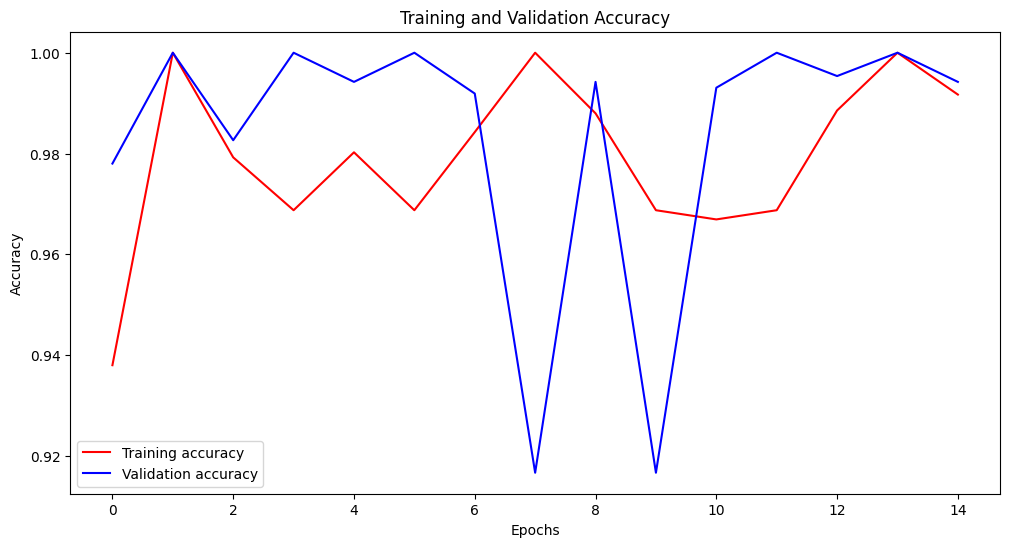

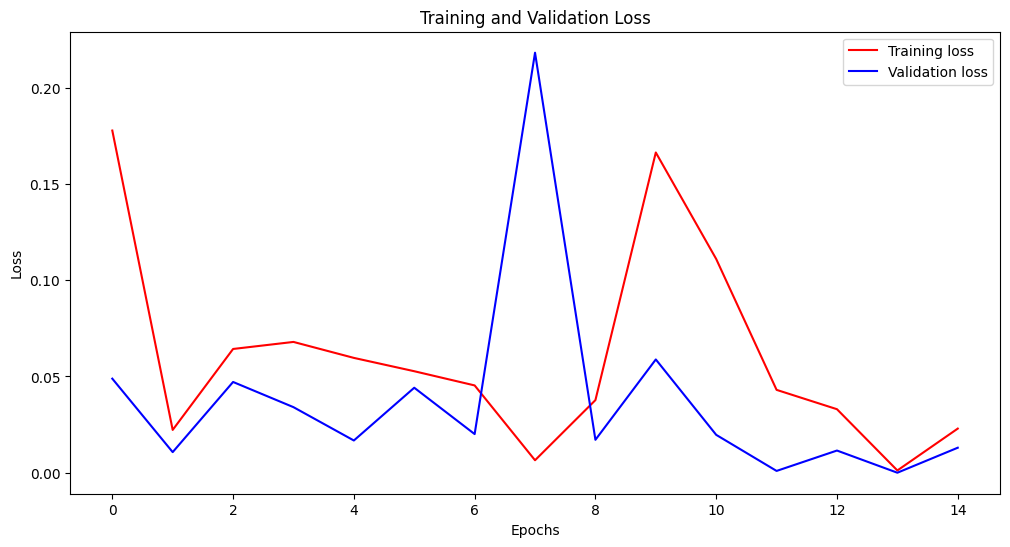

Found 880 images belonging to 5 classes.
28/28 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9979 - loss: 0.0040
Test Loss: 0.005188087001442909, Test Accuracy: 0.9977272748947144
28/28 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step
Class-wise Accuracies:
Bud Root Dropping: 100.00%
Bud Rot: 99.29%
Gray Leaf Spot: 100.00%
Leaf Rot: 99.40%
Stem Bleeding: 100.00%
               class  precision    recall  f1-score  support
0  Bud Root Dropping   1.000000  1.000000  1.000000    155.0
1            Bud Rot   1.000000  0.992908  0.996441    141.0
2     Gray Leaf Spot   0.990741  1.000000  0.995349    214.0
3           Leaf Rot   1.000000  0.994048  0.997015    168.0
4      Stem Bleeding   1.000000  1.000000  1.000000    202.0
5          macro avg   0.998148  0.997391  0.997761    880.0
6       weighted avg   0.997748  0.997727  0.997729    880.0


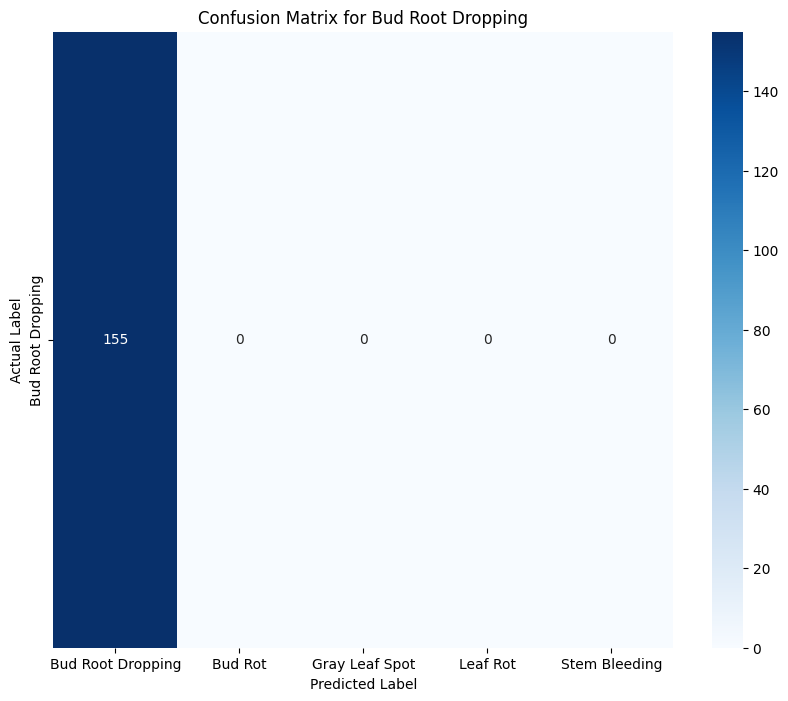

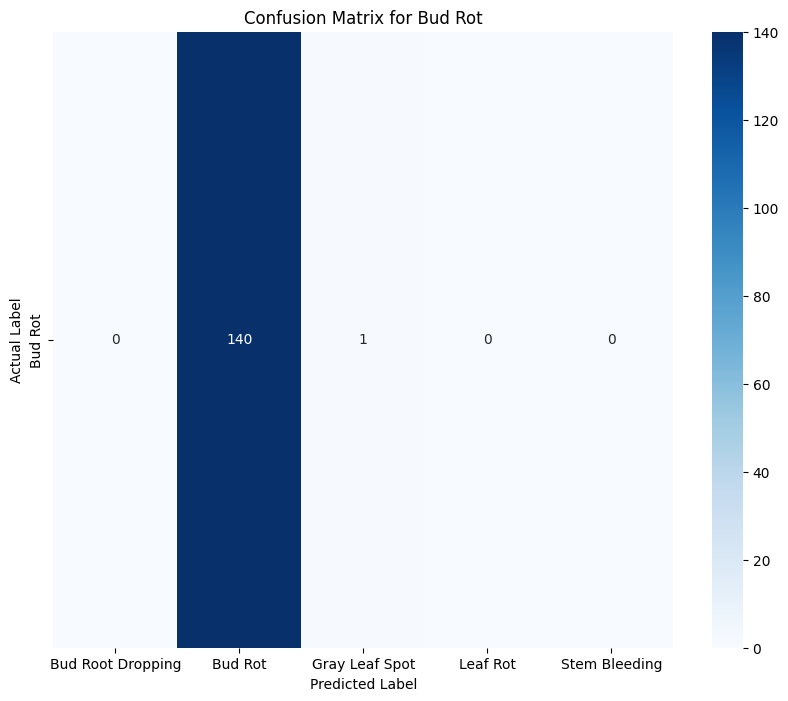

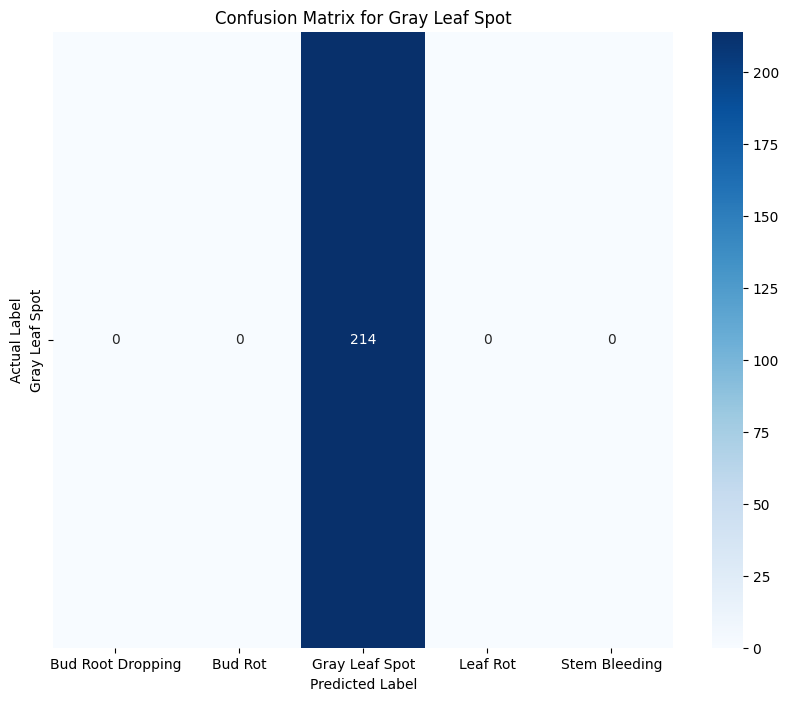

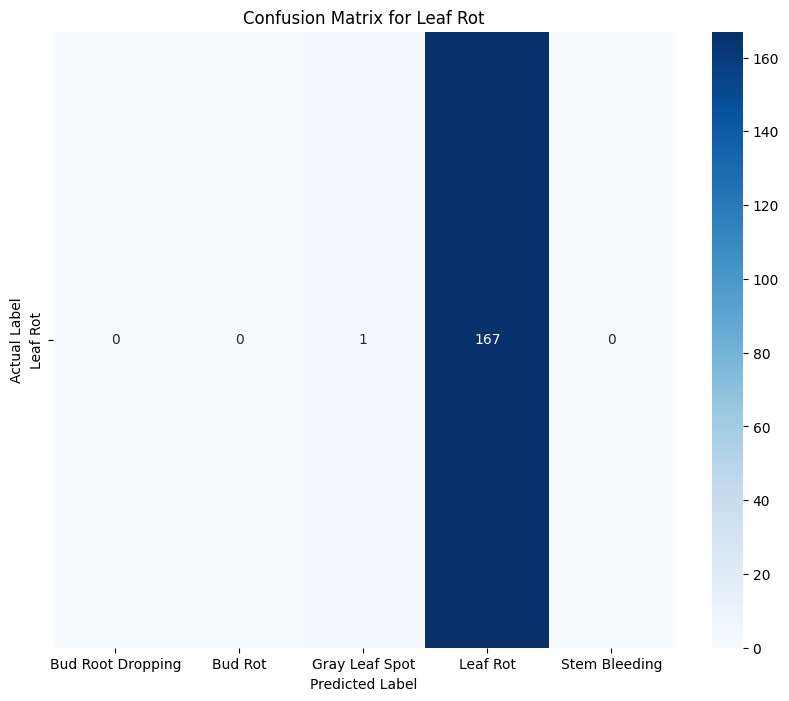

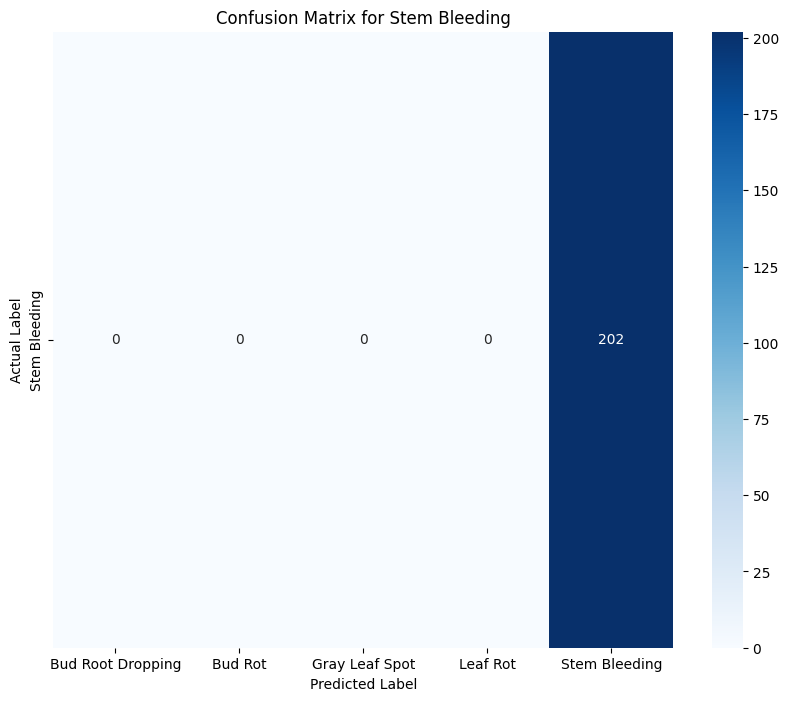

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

# Directories
train_dir = r"C:\Users\varun\data_set\divide\train"
test_dir = r"C:\Users\varun\data_set\divide\test"
validation_dir = r"C:\Users\varun\data_set\divide\val"

# Data Generators
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
)

# Data Generators Flow From Directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Use 'categorical' if it's multi-class, change to 'binary' if binary
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Use 'categorical' if it's multi-class, change to 'binary' if binary
)

# Model
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),
    Dense(5, activation='softmax')  # Assuming 5 classes, change to 1 if binary classification
])

# Freeze the base model during the first training phase
base_model.trainable = False

# Compilation
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',  # Use 'categorical_crossentropy' for multi-class classification
              metrics=['accuracy'])

# Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Adjust based on your dataset size and model's performance
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Unfreeze the base model for fine-tuning
base_model.trainable = True

# Re-compilation
model.compile(optimizer=Adam(learning_rate=0.0001),  # Lower learning rate
              loss='categorical_crossentropy',  # Use 'categorical_crossentropy' for multi-class classification
              metrics=['accuracy'])

# Continue training for fine-tuning
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,  # Fine-tuning epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Plotting training history
def plot_training_history(history, history_fine):
    # Combine history and history_fine
    acc = history.history['accuracy'] + history_fine.history['accuracy']
    val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
    loss = history.history['loss'] + history_fine.history['loss']
    val_loss = history.history['val_loss'] + history_fine.history['val_loss']
    epochs = range(len(acc))
    
    # Plot accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    # Plot loss
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_training_history(history, history_fine)

# Evaluation
test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # Use 'categorical' if it's multi-class, change to 'binary' if binary
    shuffle=False
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_labels = test_generator.classes
test_generator.reset()

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_classes)
class_names = list(test_generator.class_indices.keys())

# Class-wise Accuracy
class_accuracies = np.diag(cm) / np.sum(cm, axis=1)
classwise_accuracy_dict = {class_names[i]: class_accuracies[i] for i in range(len(class_names))}

print("Class-wise Accuracies:")
for class_name, accuracy in classwise_accuracy_dict.items():
    print(f"{class_name}: {accuracy*100:.2f}%")

# Classification Report
report = classification_report(true_labels, predicted_classes, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()

if 'accuracy' in report_df.index:
    report_df = report_df.drop(index='accuracy')

report_df.reset_index(inplace=True)
report_df.rename(columns={'index': 'class'}, inplace=True)

# Save the report to a CSV file
report_df.to_csv('classification_report.csv', index=False)

# Display the report
print(report_df)

# Optionally Plot Class-wise Confusion Matrices
def plot_classwise_confusion_matrix(cm, class_name, index, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm[index:index+1], annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=[class_name])
    plt.title(f'Confusion Matrix for {class_name}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

# To plot for a specific class, for example the first class, you can do:
# plot_classwise_confusion_matrix(cm, class_names[0], 0, class_names)

# If you want to plot for all classes, you can use:
for i, class_name in enumerate(class_names):
    plot_classwise_confusion_matrix(cm, class_name, i, class_names)


Found 7016 images belonging to 5 classes.
Found 876 images belonging to 5 classes.
Epoch 1/10


C:\Users\varun\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


219/219 ━━━━━━━━━━━━━━━━━━━━ 307s 1s/step - accuracy: 0.8809 - loss: 0.3254 - val_accuracy: 0.9861 - val_loss: 0.0434
Epoch 2/10
  1/219 ━━━━━━━━━━━━━━━━━━━━ 3:19 916ms/step - accuracy: 0.9688 - loss: 0.1420

C:\Users\varun\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9688 - loss: 0.1420 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 310s 1s/step - accuracy: 0.9765 - loss: 0.0769 - val_accuracy: 0.9884 - val_loss: 0.0258
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 0.0432 - val_accuracy: 1.0000 - val_loss: 0.0085
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 300s 1s/step - accuracy: 0.9861 - loss: 0.0462 - val_accuracy: 0.9907 - val_loss: 0.0230
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9375 - loss: 0.0646 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 323s 1s/step - accuracy: 0.9839 - loss: 0.0469 - val_accuracy: 0.9931 - val_loss: 0.0208
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0330 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 330s 1s/step - accuracy: 0.9869 - loss: 0.0390 - val_accuracy: 0.9954 - 

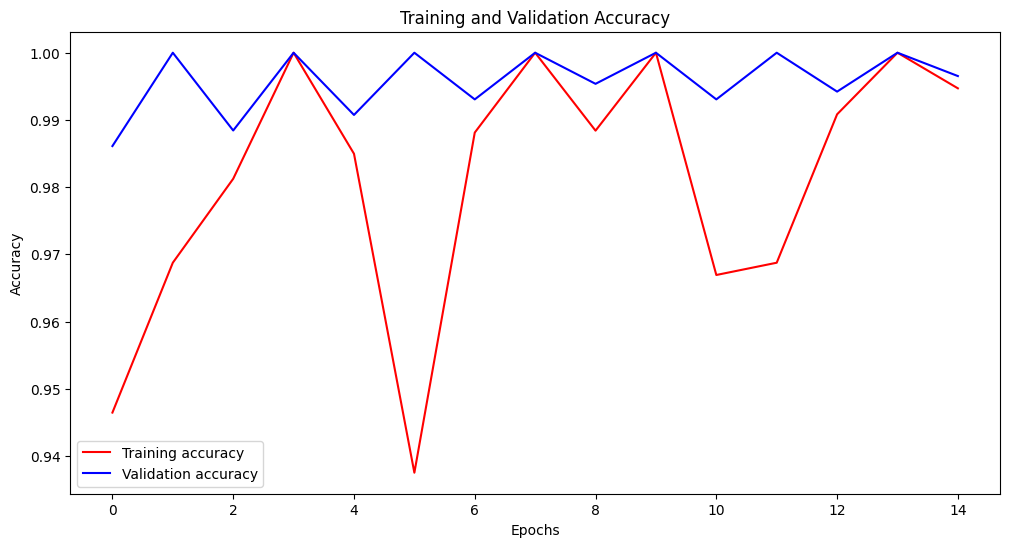

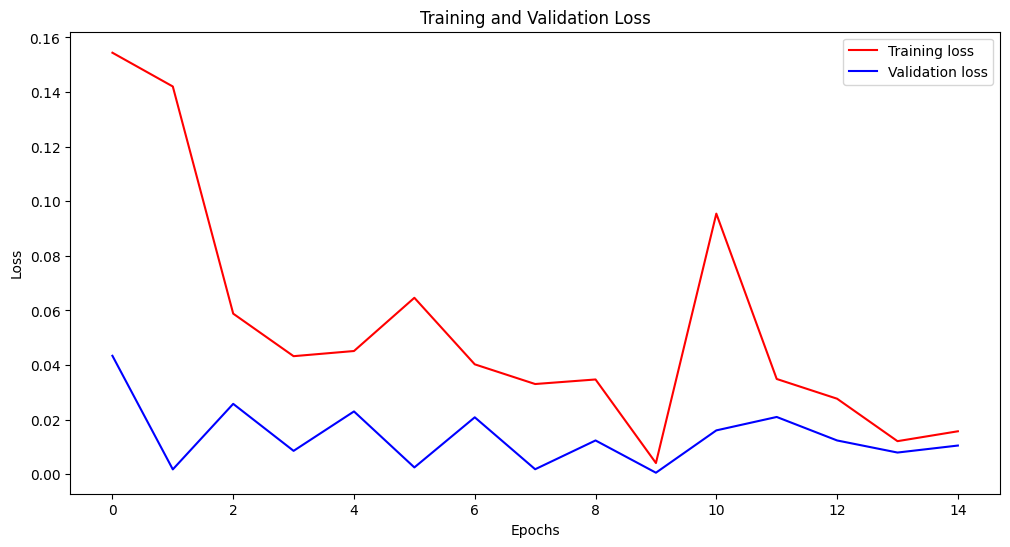

Found 880 images belonging to 5 classes.
28/28 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9980 - loss: 0.0042
Test Loss: 0.00680307112634182, Test Accuracy: 0.9965909123420715
28/28 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step
Class-wise Accuracies:
Bud Root Dropping: 100.00%
Bud Rot: 100.00%
Gray Leaf Spot: 100.00%
Leaf Rot: 98.21%
Stem Bleeding: 100.00%
               class  precision    recall  f1-score  support
0  Bud Root Dropping   1.000000  1.000000  1.000000    155.0
1            Bud Rot   1.000000  1.000000  1.000000    141.0
2     Gray Leaf Spot   0.986175  1.000000  0.993039    214.0
3           Leaf Rot   1.000000  0.982143  0.990991    168.0
4      Stem Bleeding   1.000000  1.000000  1.000000    202.0
5          macro avg   0.997235  0.996429  0.996806    880.0
6       weighted avg   0.996638  0.996591  0.996587    880.0


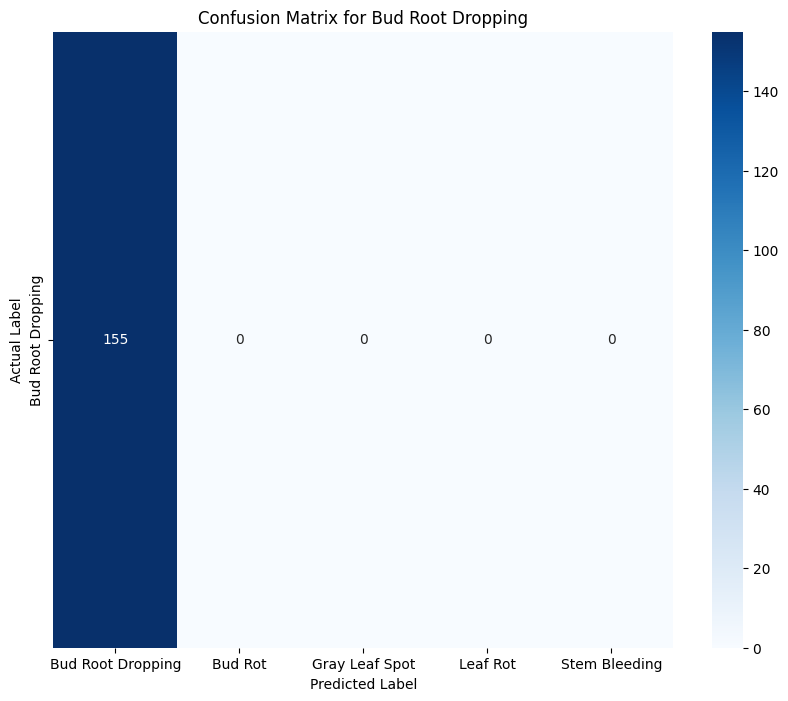

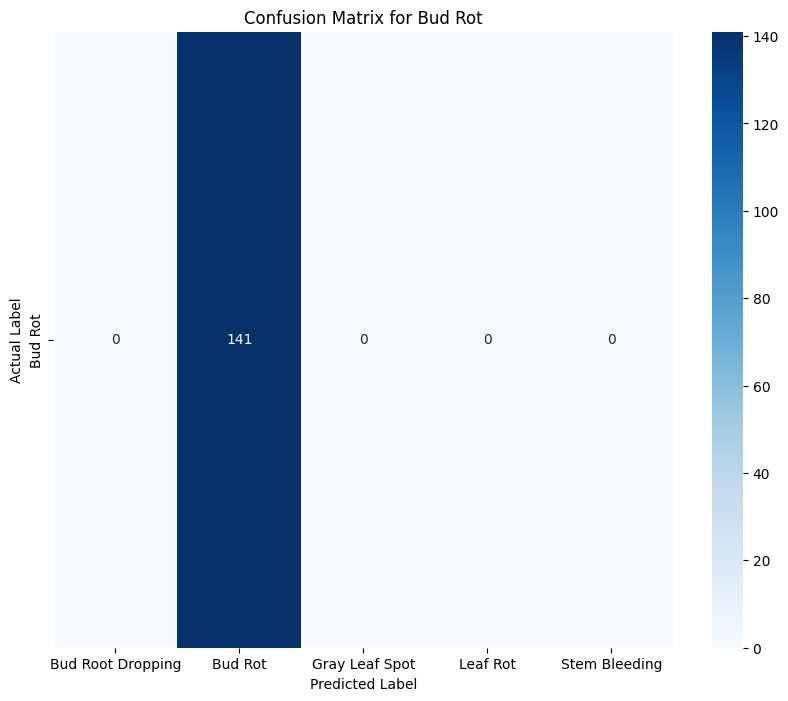

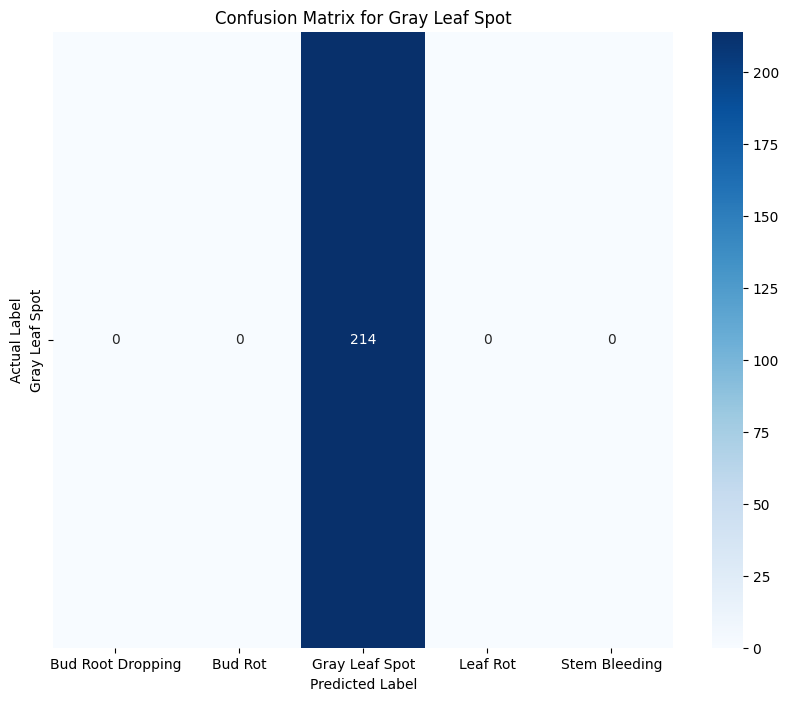

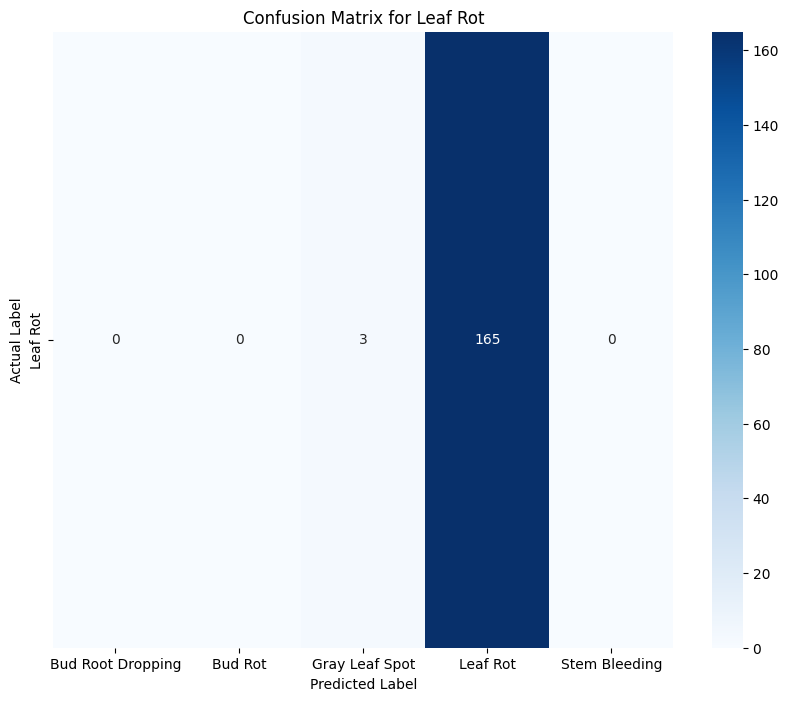

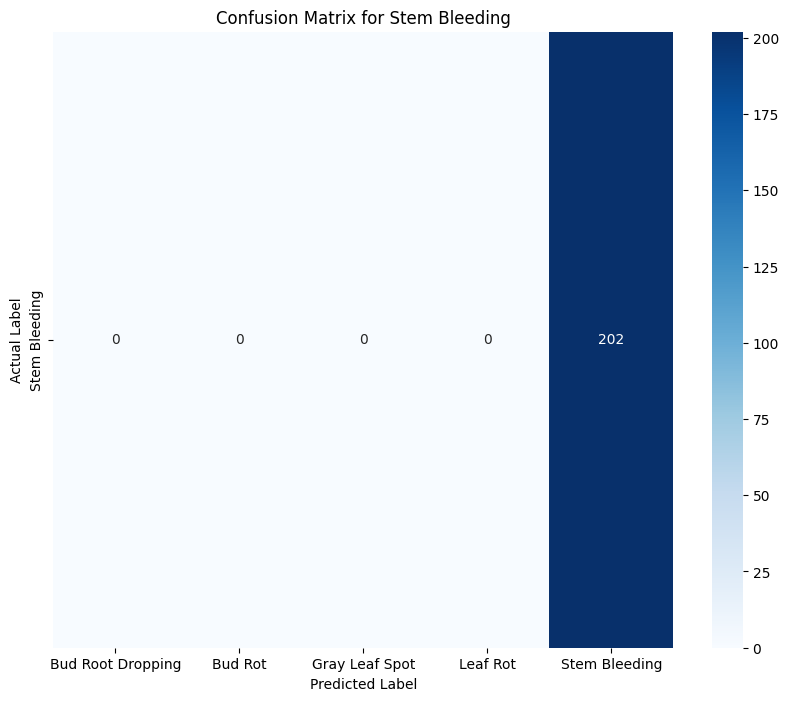

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

# Directories
train_dir = r"C:\Users\varun\data_set\divide\train"
test_dir = r"C:\Users\varun\data_set\divide\test"
validation_dir = r"C:\Users\varun\data_set\divide\val"

# Data Generators
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
)

# Data Generators Flow From Directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Use 'categorical' if it's multi-class, change to 'binary' if binary
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Use 'categorical' if it's multi-class, change to 'binary' if binary
)

# Model
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='swish'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # Assuming 5 classes, change to 1 if binary classification
])

# Freeze the base model during the first training phase
base_model.trainable = False

# Compilation
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',  # Use 'categorical_crossentropy' for multi-class classification
              metrics=['accuracy'])

# Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Adjust based on your dataset size and model's performance
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Unfreeze the base model for fine-tuning
base_model.trainable = True

# Re-compilation
model.compile(optimizer=Adam(learning_rate=0.0001),  # Lower learning rate
              loss='categorical_crossentropy',  # Use 'categorical_crossentropy' for multi-class classification
              metrics=['accuracy'])

# Continue training for fine-tuning
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,  # Fine-tuning epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Plotting training history
def plot_training_history(history, history_fine):
    # Combine history and history_fine
    acc = history.history['accuracy'] + history_fine.history['accuracy']
    val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
    loss = history.history['loss'] + history_fine.history['loss']
    val_loss = history.history['val_loss'] + history_fine.history['val_loss']
    epochs = range(len(acc))
    
    # Plot accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    # Plot loss
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_training_history(history, history_fine)

# Evaluation
test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # Use 'categorical' if it's multi-class, change to 'binary' if binary
    shuffle=False
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_labels = test_generator.classes
test_generator.reset()

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_classes)
class_names = list(test_generator.class_indices.keys())

# Class-wise Accuracy
class_accuracies = np.diag(cm) / np.sum(cm, axis=1)
classwise_accuracy_dict = {class_names[i]: class_accuracies[i] for i in range(len(class_names))}

print("Class-wise Accuracies:")
for class_name, accuracy in classwise_accuracy_dict.items():
    print(f"{class_name}: {accuracy*100:.2f}%")

# Classification Report
report = classification_report(true_labels, predicted_classes, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()

if 'accuracy' in report_df.index:
    report_df = report_df.drop(index='accuracy')

report_df.reset_index(inplace=True)
report_df.rename(columns={'index': 'class'}, inplace=True)

# Save the report to a CSV file
report_df.to_csv('classification_report.csv', index=False)

# Display the report
print(report_df)

# Optionally Plot Class-wise Confusion Matrices
def plot_classwise_confusion_matrix(cm, class_name, index, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm[index:index+1], annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=[class_name])
    plt.title(f'Confusion Matrix for {class_name}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

# To plot for a specific class, for example the first class, you can do:
# plot_classwise_confusion_matrix(cm, class_names[0], 0, class_names)

# If you want to plot for all classes, you can use:
for i, class_name in enumerate(class_names):
    plot_classwise_confusion_matrix(cm, class_name, i, class_names)


Found 7016 images belonging to 5 classes.
Found 876 images belonging to 5 classes.
Epoch 1/10


C:\Users\varun\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


219/219 ━━━━━━━━━━━━━━━━━━━━ 311s 1s/step - accuracy: 0.8822 - loss: 0.3054 - val_accuracy: 0.9780 - val_loss: 0.0513
Epoch 2/10
  1/219 ━━━━━━━━━━━━━━━━━━━━ 3:27 952ms/step - accuracy: 0.9688 - loss: 0.0513

C:\Users\varun\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9688 - loss: 0.0513 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 299s 1s/step - accuracy: 0.9788 - loss: 0.0653 - val_accuracy: 0.9861 - val_loss: 0.0372
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.0623 - val_accuracy: 1.0000 - val_loss: 2.6116e-04
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 297s 1s/step - accuracy: 0.9859 - loss: 0.0439 - val_accuracy: 0.9896 - val_loss: 0.0393
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9688 - loss: 0.2889 - val_accuracy: 1.0000 - val_loss: 0.0074
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 305s 1s/step - accuracy: 0.9868 - loss: 0.0408 - val_accuracy: 0.9907 - val_loss: 0.0241
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0134 - val_accuracy: 1.0000 - val_loss: 2.3126e-05
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 304s 1s/step - accuracy: 0.9842 - loss: 0.0417 - val_accuracy: 0

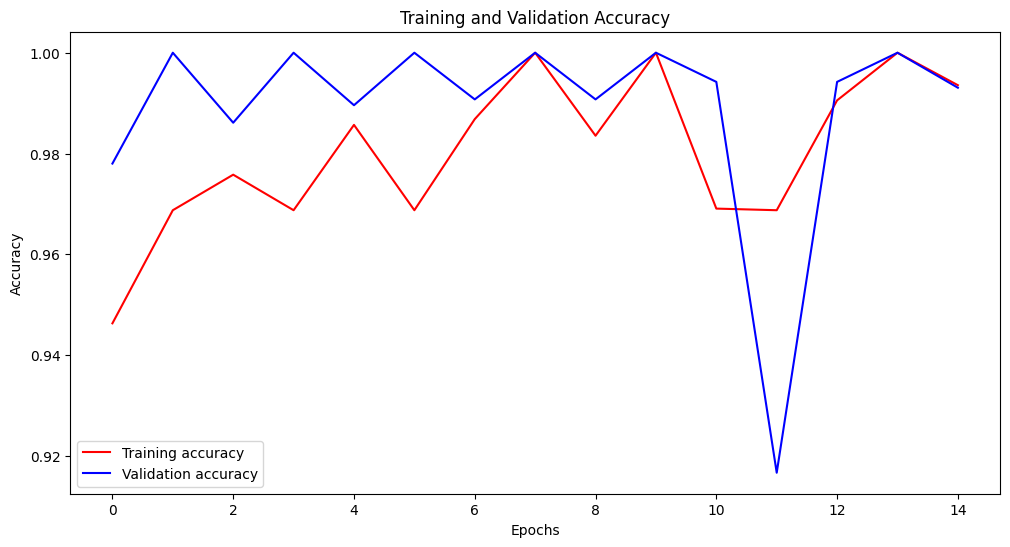

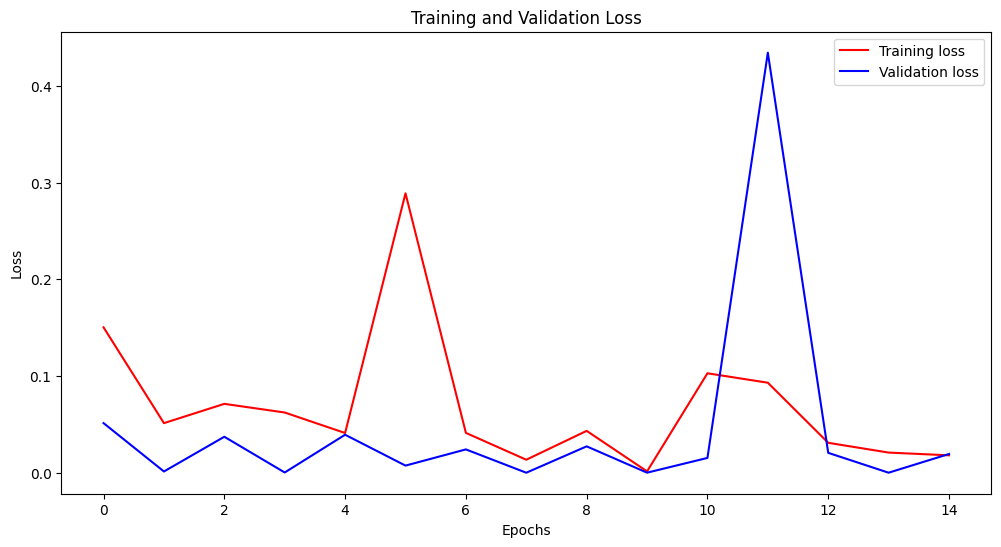

Found 880 images belonging to 5 classes.
28/28 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9987 - loss: 0.0039
Test Loss: 0.0057625435292720795, Test Accuracy: 0.9977272748947144
28/28 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step
Class-wise Accuracies:
Bud Root Dropping: 100.00%
Bud Rot: 100.00%
Gray Leaf Spot: 100.00%
Leaf Rot: 98.81%
Stem Bleeding: 100.00%
               class  precision    recall  f1-score  support
0  Bud Root Dropping   1.000000  1.000000  1.000000    155.0
1            Bud Rot   1.000000  1.000000  1.000000    141.0
2     Gray Leaf Spot   0.995349  1.000000  0.997669    214.0
3           Leaf Rot   1.000000  0.988095  0.994012    168.0
4      Stem Bleeding   0.995074  1.000000  0.997531    202.0
5          macro avg   0.998085  0.997619  0.997842    880.0
6       weighted avg   0.997738  0.997727  0.997723    880.0


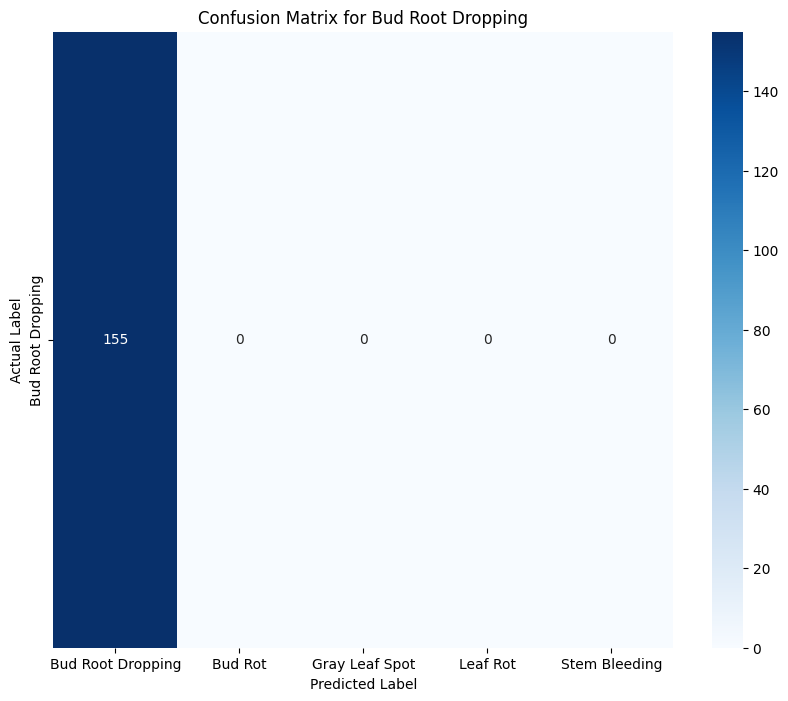

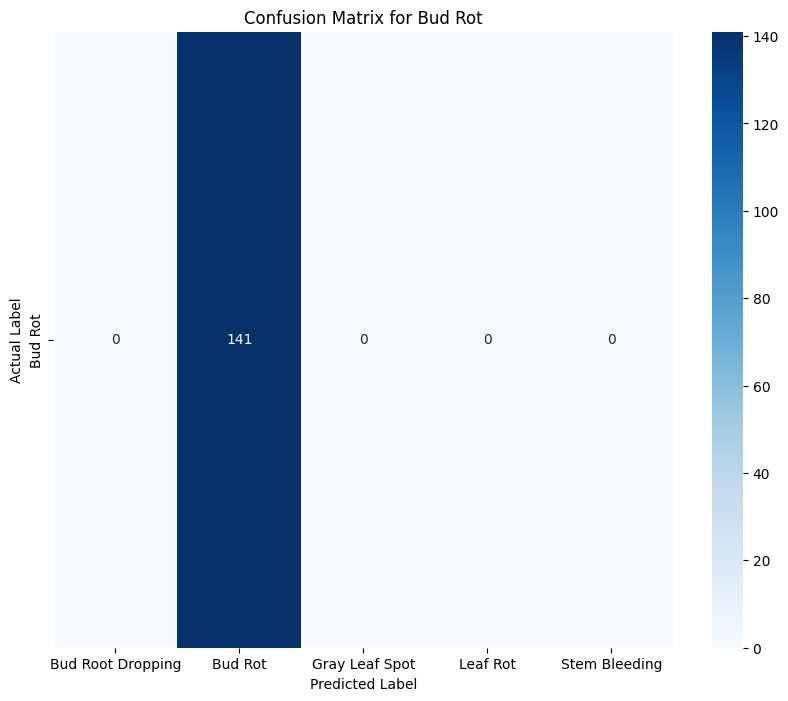

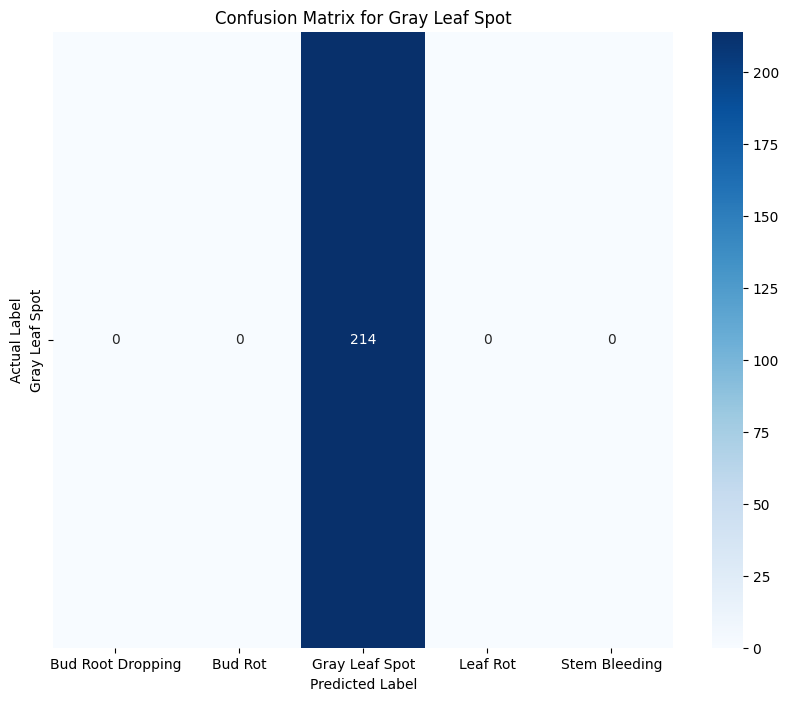

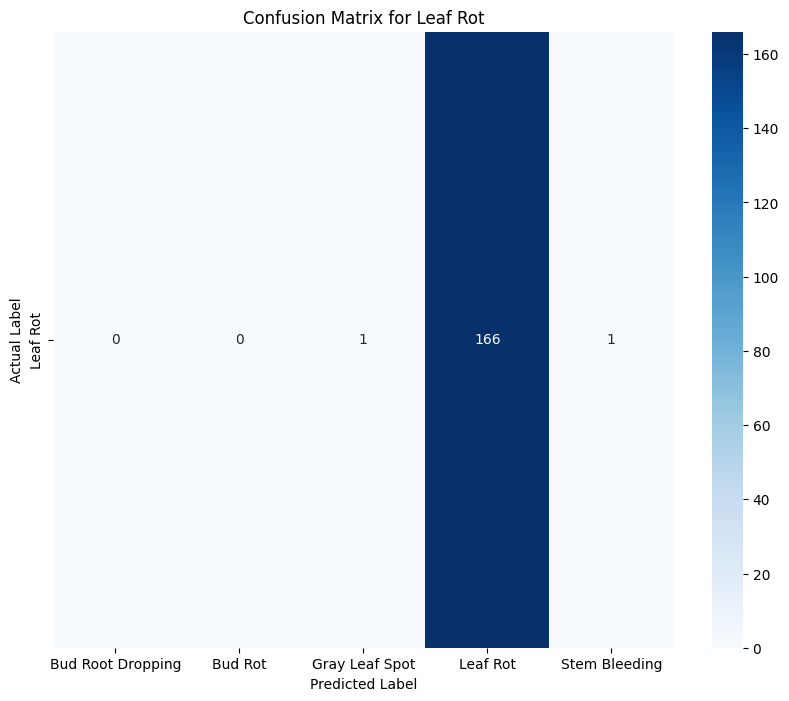

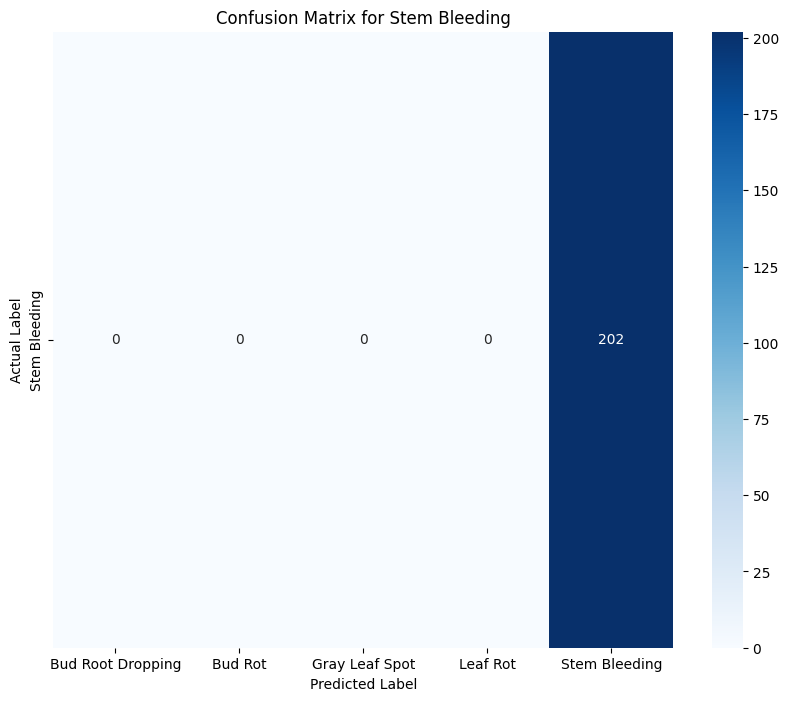

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, ELU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

# Directories
train_dir = r"C:\Users\varun\data_set\divide\train"
test_dir = r"C:\Users\varun\data_set\divide\test"
validation_dir = r"C:\Users\varun\data_set\divide\val"

# Data Generators
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
)

# Data Generators Flow From Directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Use 'categorical' if it's multi-class, change to 'binary' if binary
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Use 'categorical' if it's multi-class, change to 'binary' if binary
)

# Model
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256),
    ELU(alpha=1.0),
    Dropout(0.5),
    Dense(5, activation='softmax')  # Assuming 5 classes, change to 1 if binary classification
])

# Freeze the base model during the first training phase
base_model.trainable = False

# Compilation
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',  # Use 'categorical_crossentropy' for multi-class classification
              metrics=['accuracy'])

# Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Adjust based on your dataset size and model's performance
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Unfreeze the base model for fine-tuning
base_model.trainable = True

# Re-compilation
model.compile(optimizer=Adam(learning_rate=0.0001),  # Lower learning rate
              loss='categorical_crossentropy',  # Use 'categorical_crossentropy' for multi-class classification
              metrics=['accuracy'])

# Continue training for fine-tuning
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,  # Fine-tuning epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Plotting training history
def plot_training_history(history, history_fine):
    # Combine history and history_fine
    acc = history.history['accuracy'] + history_fine.history['accuracy']
    val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
    loss = history.history['loss'] + history_fine.history['loss']
    val_loss = history.history['val_loss'] + history_fine.history['val_loss']
    epochs = range(len(acc))
    
    # Plot accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    # Plot loss
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_training_history(history, history_fine)

# Evaluation
test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # Use 'categorical' if it's multi-class, change to 'binary' if binary
    shuffle=False
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_labels = test_generator.classes
test_generator.reset()

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_classes)
class_names = list(test_generator.class_indices.keys())

# Class-wise Accuracy
class_accuracies = np.diag(cm) / np.sum(cm, axis=1)
classwise_accuracy_dict = {class_names[i]: class_accuracies[i] for i in range(len(class_names))}

print("Class-wise Accuracies:")
for class_name, accuracy in classwise_accuracy_dict.items():
    print(f"{class_name}: {accuracy*100:.2f}%")

# Classification Report
report = classification_report(true_labels, predicted_classes, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()

if 'accuracy' in report_df.index:
    report_df = report_df.drop(index='accuracy')

report_df.reset_index(inplace=True)
report_df.rename(columns={'index': 'class'}, inplace=True)

# Save the report to a CSV file
report_df.to_csv('classification_report.csv', index=False)

# Display the report
print(report_df)

# Optionally Plot Class-wise Confusion Matrices
def plot_classwise_confusion_matrix(cm, class_name, index, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm[index:index+1], annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=[class_name])
    plt.title(f'Confusion Matrix for {class_name}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

# To plot for a specific class, for example the first class, you can do:
# plot_classwise_confusion_matrix(cm, class_names[0], 0, class_names)

# If you want to plot for all classes, you can use:
for i, class_name in enumerate(class_names):
    plot_classwise_confusion_matrix(cm, class_name, i, class_names)
